In [1]:
import requests
import time
import csv
import re
from bs4 import BeautifulSoup

ModuleNotFoundError: No module named 'requests'

In [ ]:
from Bio import SeqIO
import pandas as pd 
import os
import pylab
from Bio.SeqUtils import GC
import numpy as np



def sequence_dumper():
    dataseq = pd.read_csv("DNA.csv", sep=",")
    dataseq2 = dataseq.copy()
    
    for index, row in dataseq2.iterrows():
        print(row["dna_seq"])
        break
        fname = "dataset/fasta/{}-{}.fasta".format(index+1,row["gene_name"])
        f = open(fname,"w")
        f.write(row["dna_seq"])
        f.close()

def sequence_reading():

    sizes = []
    gc_values = []
    counter = []

    for filename in os.listdir("./dataset/fasta/"):
        for seq_record in SeqIO.parse("./dataset/fasta/"+filename, "fasta"):
            np.array(sizes.append(len(seq_record)))
            np.array(gc_values.append(GC(seq_record.seq)))

            np.array(counter.append({
                "AA" : seq_record.seq.count("AA"),
                "AG" : seq_record.seq.count("AG"),
                "AT" : seq_record.seq.count("AT"),
                "AC" : seq_record.seq.count("AC"),
                "GG" : seq_record.seq.count("GG"),
                "GA" : seq_record.seq.count("GA"),
                "GT" : seq_record.seq.count("GT"),
                "GC" : seq_record.seq.count("GC"),
                "CC" : seq_record.seq.count("CC"),
                "CA" : seq_record.seq.count("CA"),
                "CG" : seq_record.seq.count("CG"),
                "CT" : seq_record.seq.count("CT"),
                "TT" : seq_record.seq.count("TT"),
                "TA" : seq_record.seq.count("TA"),
                "TC" : seq_record.seq.count("TC"),
                "TG" : seq_record.seq.count("TG"),
                }))
    data = {
        "length" : sizes,
        "gc_val" : gc_values,
        "char_counter" : counter
    }

    pylab.figure(figsize=(20,8))

    pylab.subplot(131)
    pylab.hist(sizes, bins=20)
    pylab.title(
    "%i DNA sequences\nLengths %i to %i" % (len(sizes), min(sizes), max(sizes))
    )
    pylab.xlabel("Sequence length (bp)")
    pylab.ylabel("Num of Locus")

    pylab.subplot(132)
    pylab.scatter("length","gc_val", data=data, color="red" )
    pylab.title("%i DNA sequences\nGC%% %0.1f to %0.1f" % (len(gc_values), min(gc_values), max(gc_values)))
    pylab.xlabel("Genes")
    pylab.ylabel("GC%")

    # pylab.subplot(113)
    # pylab.plot(counter)
    # pylab.xlabel("Char")
    # pylab.ylabel("Num")

    pylab.show()

    print(data)


Based on the Scatter Plot, are length of the sequence doesnt affect the GC values.

In polymerase chain reaction (PCR) experiments, the GC-content of short oligonucleotides known as primers is often used to predict their annealing temperature to the template DNA. A higher GC-content level indicates a relatively higher melting temperature.

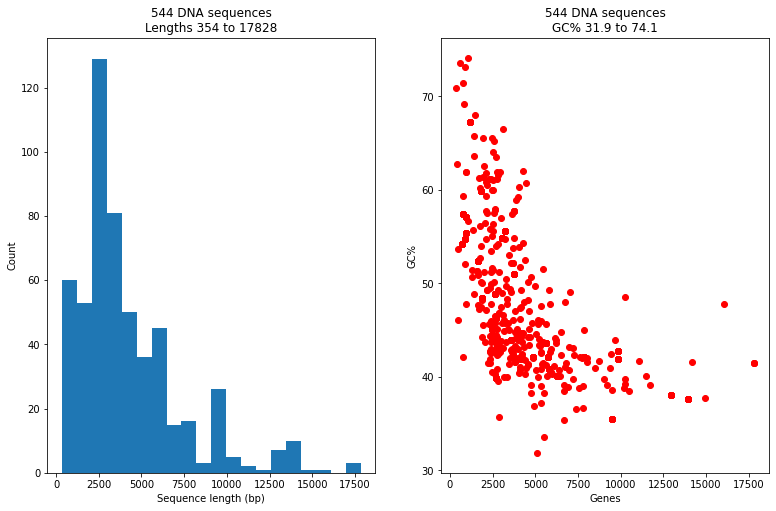

{'length': [3049, 925, 2660, 3771, 6261, 13967, 3049, 5726, 1838, 3209, 1618, 712, 863, 1897, 925, 863, 2447, 915, 9478, 12931, 9859, 790, 2691, 2447, 5627, 9862, 2519, 2720, 2734, 4177, 5780, 1201, 4837, 7866, 915, 3595, 2660, 3771, 6261, 13967, 3049, 5726, 1838, 3209, 1618, 9478, 712, 1897, 925, 863, 2447, 915, 9478, 12931, 9859, 790, 12931, 2691, 5627, 9862, 2519, 2720, 2734, 4177, 5780, 1201, 4837, 9859, 7866, 3595, 2660, 3771, 6261, 13967, 3049, 5726, 1838, 3209, 790, 1618, 712, 1897, 925, 863, 2447, 915, 9478, 12931, 9859, 2691, 790, 2691, 5627, 9862, 2519, 2720, 2734, 4177, 5780, 1201, 5627, 4837, 7866, 3595, 2660, 3771, 6261, 13967, 3049, 5726, 1838, 5726, 9862, 3209, 1618, 712, 1897, 925, 863, 2447, 915, 9478, 12931, 2519, 9859, 790, 2691, 5627, 9862, 2519, 2720, 2734, 4177, 5780, 2720, 1201, 4837, 7866, 3595, 2660, 3771, 6261, 13967, 13967, 13967, 2734, 3414, 405, 2042, 2271, 873, 4300, 4453, 4038, 1906, 7220, 4177, 3677, 3677, 943, 5035, 4409, 2269, 1660, 4814, 2769, 11501, 

In [ ]:
def write_to_csv(list_input):
    # The scraped info will be written to a CSV here.
    try:
        with open("DNA.csv", "a") as fopen:  # Open the csv file.
            csv_writer = csv.writer(fopen)
            csv_writer.writer(list_input)
    except:
        return False
        
def gene_info(path):
    url = "https://funricegenes.github.io{}"
    selector = "section.post > ul > li > ul > li > a"
    
    try:
        loc = requests.get(url.format(path)).text
        s = BeautifulSoup(loc, "html.parser")
        link = s.select(selector)[0]["href"]
        print(link.find("rice.uga.edu"))


        if link.find("rice.uga.edu") != -1:
            locus_name = s.select(selector)[0].text
            print("Info {} : {}".format(url+path, locus_name))
            dna_url = "http://rice.uga.edu/cgi-bin/sequence_display.cgi?orf="+format(locus_name)
            dna_page = requests.get(dna_url).text
            
            dna_soup = BeautifulSoup(dna_page, "html.parser")
            dna_info = dna_soup.find_all("pre");
          
            return(locus_name,dna_info)
        else :
            return False
    except Exception as e:
        return False
    
def gene_list(seed_url):
    gene = {}
    html = requests.get(seed_url).text
    soup = BeautifulSoup(html, "html.parser")
    print("Getting all gene Lists..")
    genelist = soup.find_all("li", class_="listing-item") 

    for item in genelist:
        gene_name = item.find("a")["title"]
        info_url = item.find("a")["href"]
        
        locus_and_dna = gene_info(info_url)
       
        if not locus_and_dna:
            next
        else:
            print(locus_and_dna[1])
            locus_name = locus_and_dna[0]
            dna_sequence = locus_and_dna[1][0]
            cds = locus_and_dna[1][1]
            
        write_to_csv([gene_name, info_url, locus_name, dna_sequence, cds])
        time.sleep(2)

if __name__ == "__main__":
    # seed_url = "https://funricegenes.github.io/categories"
    # print("Web scraping has begun")
    # result = gene_list(seed_url)
    # # result = browse_and_scrape(seed_url)
    # if result == True:
    #     print("Web scraping is now complete!")
    # else:
    #     print(f"Oops, That doesn't seem right!!! - {result}")
    # sequence_dumper()
    sequence_reading()